In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, DepthwiseConv2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import LearningRateScheduler



Using TensorFlow backend.


In [0]:
from keras import regularizers

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 14s 0us/step


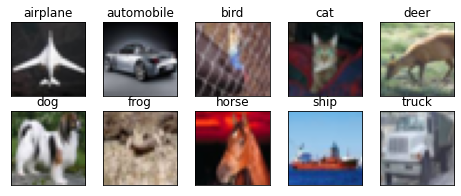

In [0]:

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
img_rows

32

In [0]:
#model2
weight_decay = 1e-4

model = tf.keras.models.Sequential([
    #yeh hoga pahla layer ka cluster
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    # tf.keras.layers.SeparableConv1D(32, 3,3 , padding= 'same' , activation = 'relu' ,  kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3,3 ,padding= 'same' , activation = 'relu' , kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), ),

    #yeh hoga pahla layer ka cluster
    tf.keras.layers.Conv2D(64, 3,3 , padding= 'same' , activation = 'relu' ,  kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3,3 ,padding= 'same' , activation = 'relu' , kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    #yeh hoga pahla layer ka cluster
    tf.keras.layers.Conv2D(128, 3,3 , padding= 'same' , activation = 'relu' ,  kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3,3 ,padding= 'same' , activation = 'relu' , kernel_regularizer= regularizers.l2(weight_decay),),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

    


])

In [0]:
#model 1

model = Sequential()
model.add(Conv2D(32, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), border_mode='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipyker

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)       

In [0]:
#model3
model = Sequential()

model.add(Conv2D(32 , 3,3 , border_mode='same' , input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32 , 3,3 ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64 , 3,3 , border_mode='same'))
model.add(Activation('relu'))
# model.add(Conv2D(64 , 3,3 , border_mode='same'))
model.add(Conv2D(64 , 3,3 ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128 , 3,3 , border_mode='same'))
model.add(Activation('relu'))
# model.add(Conv2D(128 , 3,3 , border_mode='same'))
model.add(Conv2D(64 , 3,3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [0]:
import keras
#data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_features)

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.fit(train_features, train_labels, batch_size=32, nb_epoch=50, verbose=1)

Epoch 1/50
  512/50000 [..............................] - ETA: 18s - loss: 1.2829 - acc: 0.5430

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


50000/50000 [==============================] - 15s 306us/step - loss: 1.1322 - acc: 0.6065
Epoch 2/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.0338 - acc: 0.6481
Epoch 3/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.9508 - acc: 0.6776
Epoch 4/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.8985 - acc: 0.6980
Epoch 5/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.8425 - acc: 0.7173
Epoch 6/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.7933 - acc: 0.7333
Epoch 7/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.7517 - acc: 0.7518
Epoch 8/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.7148 - acc: 0.7616
Epoch 9/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.6893 - acc: 0.7685
Epoch 10/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.6711 - ac

In [0]:
 score = model.evaluate(test_features, test_labels, verbose=1)

10000/10000 [==============================] - 1s 112us/step


In [0]:
score

[0.4845757351756096, 0.8447]

last trained on  #**model3** 19th march 


In [0]:
model.save('model19march.h5')

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

Saving Screenshot from 2020-03-12 13-49-39.png to Screenshot from 2020-03-12 13-49-39.png
Saving Screenshot from 2020-03-12 13-52-55.png to Screenshot from 2020-03-12 13-52-55.png
Saving Screenshot from 2020-03-12 13-53-05.png to Screenshot from 2020-03-12 13-53-05.png
Saving Screenshot from 2020-03-12 13-53-49.png to Screenshot from 2020-03-12 13-53-49.png
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model.save('model.h5')